# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"
signname_file = "signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

signmap = pd.read_csv(signname_file, delimiter=',')

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(signmap)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

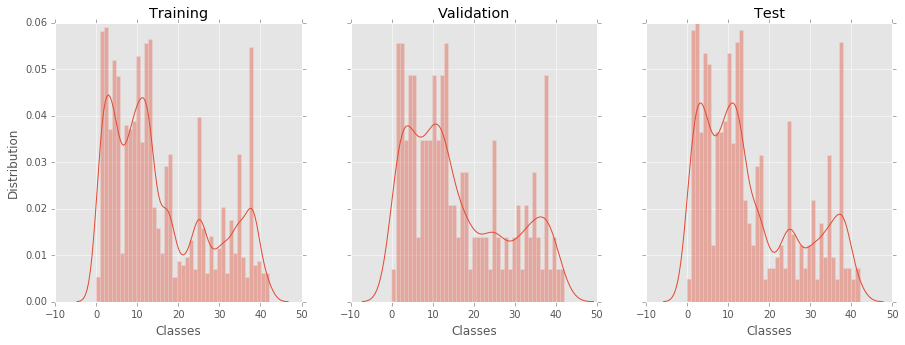

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from matplotlib import style
# Visualizations will be shown in the notebook.
%matplotlib inline
import seaborn as sns

style.use('ggplot')

fig, axs = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
_ = sns.distplot(y_train, bins=n_classes, ax=axs[0])
_ = sns.distplot(y_valid, bins=n_classes, ax=axs[1])
_ = sns.distplot(y_test, bins=n_classes, ax=axs[2])
_ = axs[0].set_title('Training')
_ = axs[1].set_title('Validation')
_ = axs[2].set_title('Test')
_ = axs[0].set_xlabel('Classes')
_ = axs[1].set_xlabel('Classes')
_ = axs[2].set_xlabel('Classes')
_ = axs[0].set_ylabel('Distribution')

<span style="color:indigo"> To have minimum number of samples for each classes, first we need to know where each class appears in the input data set and how many more examples does each of this class needs. </span>

In [4]:
# Minimum number of examples in each class
MIN_EXAMPLES = 1000

# For each class which where the exist in training data and arrange them by their class ids
class_indices = np.array([np.where(y_train[:] == classid) for classid in range(n_classes)])

# How many examples does each class have
num_examples = np.array([len(classes) for classes in class_indices[:,0][:]])
print(num_examples)

# How many more examples are needed for each class to have minimum number of examples
more_examples = np.array([max(MIN_EXAMPLES - n_example, 0) for n_example in num_examples])
print(more_examples)

# These are number of augmentations per every image in class
per_image_augmentations = more_examples // num_examples
print(per_image_augmentations)

# Number of random images to select for each classes and create 1 augmentation
random_image_augmentations = more_examples % num_examples
print(random_image_augmentations)

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
[820   0   0   0   0   0 640   0   0   0   0   0   0   0 310 460 640  10
   0 820 700 730 670 550 760   0 460 790 520 760 610 310 790 401 640   0
 670 820   0 730 700 790 790]
[4 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 4 2 2 2 1 3 0 0 3 1 3 1 0 3 0 1 0 2
 4 0 2 2 3 3]
[100   0   0   0   0   0 280   0   0   0   0   0   0   0 310 460 280  10
   0 100 100 190  10 100  40   0 460 160  40  40 220 310 160 401 280   0
  10 100   0 190 100 160 160]


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [18]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf

model_graph = tf.Graph()
with model_graph.as_default():
    # placeholder to hold x and y data
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    is_training = tf.placeholder(tf.bool)

    # Convert input image to grascale and normalize pixel values
    x_gray = tf.image.rgb_to_grayscale(x)
    x_norm = tf.map_fn(lambda image: tf.image.per_image_standardization(image), x_gray)

    # convert classes into one hot format
    one_hot_y = tf.one_hot(y, n_classes)

<span style="color:indigo">Let's run grayscaling and normalization on input image and see how it looks like<span>

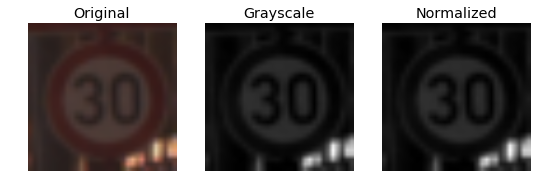

In [29]:
with tf.Session(graph=model_graph) as sess:
    # Pick a randomly selected image run grascale conversion followed by normalization
    orig = np.empty((1,)+image_shape, dtype=np.uint8)
    orig[0] = X_train[np.random.randint(0, len(X_train))]
    gray = sess.run(x_gray, feed_dict={x: orig})
    norm = sess.run(x_norm, feed_dict={x_gray: gray})
    
    # Matplotlib expects 2D array for 'gray' cmap
    gray = np.squeeze(gray, 3)
    norm = np.squeeze(norm, 3)
    
    plt.figure(figsize=(9,3))
    
    # Original
    plt.subplot(131)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(orig[0])
    
    # Grascale
    plt.subplot(132)
    plt.title('Grayscale')
    plt.axis('off')
    plt.imshow(gray[0], cmap='gray')
    
    # Normalized
    plt.subplot(133)
    plt.title('Normalized')
    plt.axis('off')
    plt.imshow(norm[0], cmap='gray')

<span style="color:indigo"> As seen in exploratory visualization of data set, the input data set has non-uniform distribution of number of examples, some classes have more examples than the other. This is not good for training the model as it will learn to predict some of the classes with more accuracy than the others. To balance out classes with lesser number of examples, we use different image transformation techniques to create random combinations of input images. We use following transformations: </span>

1. <span style="color:indigo"> Brightness adjustment </span>
2. <span style="color:indigo"> Shift </span>
3. <span style="color:indigo"> Rotate </span>
4. <span style="color:indigo"> Shear </span>
5. <span style="color:indigo"> Flip left right or up down </span>

<span style="color:indigo"> Besides augmenting input dataset, these transformations also helps in learning patterns in images when same image is seen from different angles/distance etc. </span>

In [30]:
import tensorflow.contrib.image as tfimg

with model_graph.as_default():
    # Flip image on random probability left_right or up_down or return unchanged
    def flip_image(image):
        prob = tf.random_uniform(shape=(), minval=0, maxval=2, dtype=tf.int32)
        image = tf.cond(tf.equal(prob, 0), lambda: tf.image.random_flip_left_right(image), lambda: image)
        image = tf.cond(tf.equal(prob, 1), lambda: tf.image.random_flip_up_down(image), lambda: image)
        return image

    # Helper function to define transformations
    # Credits: https://stackoverflow.com/questions/42263689/how-to-translate-or-shift-batches-of-tensors-randomly-in-tensorflow
    def define_transform(mask_row, n_images, rg):
        assert(mask_row.get_shape() == [1, 8])
        base_row = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32, shape=[1, 8])
        base = tf.tile(base_row, [n_images, 1])
        mask = tf.tile(mask_row, [n_images, 1])
        random_mat = rg * tf.random_uniform(shape=[n_images, 8]) - rg/2
        return (base + random_mat *  mask)

    input_images = tf.placeholder(tf.float32, shape=(None, None, None, None))
    input_labels = tf.placeholder(tf.int32, shape=(None))

    def image_transformations(input_images, angle_range, shift_range, shear_range):
        n_images = tf.shape(input_images)[0]
        height = tf.cast(tf.shape(input_images)[1], dtype=tf.float32)
        width = tf.cast(tf.shape(input_images)[2], dtype=tf.float32)

        # Adjust brightness of input images
        output_images = tf.map_fn(lambda image: tf.image.random_brightness(image, 0.5), input_images)

        # Rotate images
        rotate_angles = angle_range * tf.random_uniform(shape=[n_images]) - angle_range/2
        rotate = tfimg.angles_to_projective_transforms(rotate_angles, height, width)

        # Translate images: [1, 0, tx, 0, 1, ty, 0, 0]
        shift = define_transform(tf.constant([0, 0, 1, 0, 0, 1, 0, 0], dtype=tf.float32, shape=[1, 8]),
                                 n_images, shift_range)
        # Shear x w.r.t. y: [1, 0, 0, Sx, 1, 0, 0, 0] 
        shear_x = define_transform(tf.constant([0, 0, 0, 1, 0, 0, 0, 0], dtype=tf.float32, shape=[1, 8]),
                                   n_images, shear_range)
        # Shear y w.r.t x: [1, Sy, 0, 0, 1, 0, 0, 0]
        shear_y = define_transform(tf.constant([0, 1, 0, 0, 0, 0, 0, 0], dtype=tf.float32, shape=[1, 8]),
                                   n_images, shear_range)

        # transform images with above transformations
        transforms = tfimg.compose_transforms(rotate, shift, shear_x, shear_y)
        output_images = tfimg.transform(output_images, transforms, interpolation='BILINEAR')

        # Randomly flip images
        output_images = tf.map_fn(lambda image: flip_image(image), output_images)

        return output_images

    def augment_images(input_images, input_labels, n_permutations):
        condition = lambda i, images, labels: tf.less(i, n_permutations)
        def body(i, images, labels):
            t_images = image_transformations(input_images, angle_range=10, shift_range=5, shear_range=1)
            images = tf.cond(tf.equal(i, 0), lambda: t_images, lambda: tf.concat([images, t_images], 0))
            labels = tf.cond(tf.equal(i, 0), lambda: input_labels, lambda: tf.concat([labels, input_labels], 0))
            return (i+1, images, labels)

        result = tf.while_loop(condition, body, loop_vars=[tf.constant(0), input_images, input_labels],
                               shape_invariants=[tf.TensorShape([]),
                                                 tf.TensorShape([None, None, None, None]),
                                                 tf.TensorShape(None)])
        # Matplotlib isn't happy about floats in images and ends up creating negative images
        # convert these back to int before returning
        return (tf.cast(result[1], dtype=tf.uint8), result[2])

<span style="color:indigo"> Let's try these transformations over randomly seleted images for each class. </span>

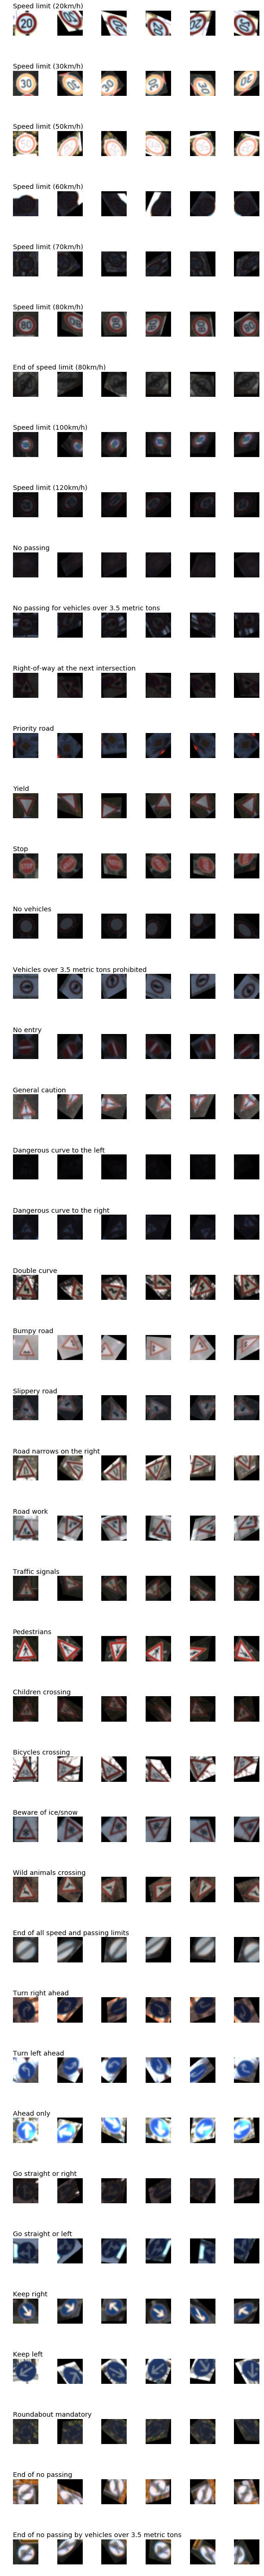

In [31]:
import random
with tf.Session(graph=model_graph) as sess:
    sess.run(tf.global_variables_initializer())
    samples = np.array([classes[np.random.randint(0, len(classes))] for classes in class_indices[:,0][:]])
    images = X_train[samples]
    labels = y_train[samples]
    n_permutations = 5
    aug_images, aug_labels = sess.run(augment_images(input_images, input_labels, n_permutations),
                                      feed_dict={input_images:images, input_labels:labels})
    assert(aug_images.shape[0] == aug_labels.shape[0])
    n_rows = len(samples)
    n_cols = n_permutations
    n_images = aug_images.shape[0]
    assert(n_rows * n_cols == n_images)
    plt.figure(figsize=(10, 100))
    pltnum = 1
    for i in range(n_rows):
        plt.subplot(n_rows*2, n_cols+1, pltnum)
        plt.axis('off')
        plt.title(signmap.iloc[labels[i]]['SignName'], loc='left')
        plt.imshow(images[i])
        pltnum += 1
        for j in range(n_cols):
            plt.subplot(n_rows*2, n_cols+1, pltnum)
            plt.axis('off')
            plt.imshow(aug_images[i + j*n_rows])
            pltnum += 1
        pltnum += n_cols+1

<span style="color:indigo"> Performance tuning for tensorflow threading </span>

In [32]:
config = tf.ConfigProto()
config.intra_op_parallelism_threads = 4
config.inter_op_parallelism_threads = 4

<span style="color:indigo"> Now we are ready to augment training data images with above transformations to get an equal examples set of images </span>

In [33]:
from tqdm import tqdm

X_train_aug = np.array([])
y_train_aug = np.array([])
BATCH_SIZE = 256

# Augment images in batches and append to X_train_aug, y_train_aug
def augment_images_in_batch(X_images, y_labels, n_permutations):
    global X_train_aug
    global y_train_aug
    for offset in range(0, X_images.shape[0], BATCH_SIZE):
        batch_x, batch_y = X_images[offset:offset+BATCH_SIZE], y_labels[offset:offset+BATCH_SIZE]
        with tf.Session(graph=model_graph, config=config) as sess:
            batch_aug_x, batch_aug_y = sess.run(augment_images(input_images, input_labels, n_permutations),
                                                feed_dict={input_images:batch_x, input_labels:batch_y})
        assert(batch_aug_x.shape[0] == batch_aug_y.shape[0])
        X_train_aug = np.concatenate([X_train_aug, batch_aug_x]) if X_train_aug.size else batch_aug_x
        y_train_aug = np.concatenate([y_train_aug, batch_aug_y]) if y_train_aug.size else batch_aug_y

# Augment images for every class
for i in tqdm(range(n_classes), desc="Augmenting images"):
    class_images = X_train[class_indices[i,0][:]]
    class_labels = np.repeat(i, class_images.shape[0])

    # create augmentations for each image in the class
    if per_image_augmentations[i] > 0:
        augment_images_in_batch(class_images, class_labels, per_image_augmentations[i])
    
    # create 1 augmentation for randomly selected image in the class
    if random_image_augmentations[i] > 0:
        random_samples = np.random.randint(0, len(class_images), random_image_augmentations[i])
        augment_images_in_batch(class_images[random_samples], class_labels[random_samples], 1)

print(X_train_aug.shape)
print(y_train_aug.shape)

Augmenting images: 100%|██████████| 43/43 [01:17<00:00,  3.57s/it]

(16891, 32, 32, 3)
(16891,)


<span style="color:indigo"> Append original training images with augmented images </span>

In [34]:
X_train_aug = np.concatenate([X_train, X_train_aug])
y_train_aug = np.concatenate([y_train, y_train_aug])

<span style="color:indigo"> Lets plot again the distribution of augmented training images </span>

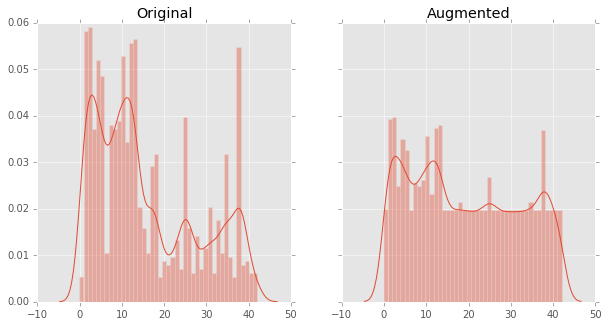

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
_ = sns.distplot(y_train, bins=n_classes, ax=axs[0])
_ = sns.distplot(y_train_aug, bins=n_classes, ax=axs[1])
_ = axs[0].set_title('Original')
_ = axs[1].set_title('Augmented')

### Model Architecture

<span style="color:indigo"> Below are helper methods in ternsorflow to used to define layers of our model </span>

In [36]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

with model_graph.as_default():
    def convolute(input, depth, kernel_size=5):
        input_depth = input.get_shape()[-1]
        w = tf.get_variable('weights',
                            shape=[kernel_size, kernel_size, input_depth, depth],
                            initializer = tf.contrib.layers.xavier_initializer())
        b = tf.get_variable('biases',
                            shape=[depth],
                            initializer = tf.constant_initializer(0.0))
        hidden = tf.nn.conv2d(input, w, strides=[1,1,1,1], padding='VALID')
        hidden = tf.nn.bias_add(hidden, b)
        return tf.nn.elu(hidden)

    def pool(input, kernel_size=2):
        return tf.nn.max_pool(input, ksize=[1,kernel_size,kernel_size,1],
                              strides=[1,kernel_size,kernel_size,1], padding='VALID')

    def fully_connect(input, depth):
        input_depth = input.get_shape()[-1]
        w = tf.get_variable('weights',
                            shape=[input_depth, depth],
                            initializer = tf.contrib.layers.xavier_initializer())
        b = tf.get_variable('biases',
                            shape=[depth],
                            initializer = tf.constant_initializer(0.0))
        return tf.matmul(input, w) + b

    def fully_connect_activate(input, depth):
        return tf.nn.elu(fully_connect(input, depth))

<span style="color:indigo"> Finally the model implementation of LeNet. This is essentially same LeNet model as was implemented in LeNet lab, but with following differences: Activation of Layer 1 output is also fed into the fully connected layer as described by Pierre Sermanet and Yann LeCun's [here](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). Below image shows layer's in the model with depths of convolutions.</span>

![LeNet Architecture](./images/MyLeNet.png)
 

In [37]:
with model_graph.as_default():
    def LeNet(x, is_training):
        # Layer 1: Convolution
        with tf.variable_scope('conv1'):
            conv_1 = convolute(x, 6)
            pool_1 = pool(conv_1)
            pool_1 = tf.cond(is_training, lambda: tf.nn.dropout(pool_1, keep_prob=0.9), lambda: pool_1)
            activation_1 = tf.identity(pool_1, name="activation")

        # Layer 2: Convolution
        with tf.variable_scope('conv2'):
            conv_2 = convolute(activation_1, 16)
            pool_2 = pool(conv_2)
            pool_2 = tf.cond(is_training, lambda: tf.nn.dropout(pool_2, keep_prob=0.8), lambda: pool_2)
            activation_2 = tf.identity(pool_2, name="activation")

        # Flatten the activation of previous layers
        flat_2 = flatten(activation_2)        
        # Bring pooling of first layer to same level as layer 2
        pool_12 = pool(activation_1)
        flat_12 = flatten(pool_12)
        flat_2 = tf.concat([flat_12, flat_2], 1)

        # Layer 3: Fully Connected
        with tf.variable_scope('fully3'):
            fully_3 = fully_connect_activate(flat_2, 120)
            fully_3 = tf.cond(is_training, lambda: tf.nn.dropout(fully_3, keep_prob=0.5), lambda: fully_3)
            activation_3 = tf.identity(fully_3, name="activation")

        # Layer 4: Fully Connected
        with tf.variable_scope('fully4'):
            fully_4 = fully_connect_activate(activation_3, 84)
            activation_4 = tf.identity(fully_4, name="activation")
            
        # Layer 4: Fully Connected
        with tf.variable_scope('fully5'):
            fully_5 = fully_connect(activation_4, n_classes)
            activation_5 = tf.identity(fully_5, name="activation")

        return activation_5

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

<span style="color:indigo"> These are hyperparameters for training the model </span>

In [39]:
# Hyper parameters
BATCH_SIZE = 256
LEARN_RATE = 0.001
EPOCHS = 50

<span style="color:indigo"> Following function can be used to plot validation accuracy of training the model at each epoch end </span>

In [40]:
from IPython import display
import matplotlib.ticker as ticker
from math import ceil

train_accuracy_list = []
valid_accuracy_list = []

def _plot(ax, x, y, _label):
    ax.plot(x, y, label=_label)
    ax.annotate("({}, {:.3f})".format(x[-1], y[-1]), xy=(x[-1], y[-1]))

def plot_accuracy(fig, ax):
    ax.clear()
    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, ceil(EPOCHS*1.1))
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epochs')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    x = np.arange(1, len(train_accuracy_list)+1)
    _plot(ax, x, train_accuracy_list, 'Training')
    _plot(ax, x, valid_accuracy_list, 'Validation')
    plt.legend(loc='lower right')
    display.display(fig)
    display.clear_output(wait=True)

<span style="color:indigo"> Below functions define the operational nodes of tensorflow which can be used to train and evaluate our model.</span>

<span style="color:red"> WARNING: Run this cell only once as it defines nodes with variable definitions, rerunning this cells makes tensorflow unhappy about duplicate definitions of variables</span>

In [41]:
with model_graph.as_default():
    # Train Model
    predicted_logits = LeNet(x_norm, is_training)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=predicted_logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
    training_operation = optimizer.minimize(loss_operation)

    # Evaluate model for its accuracy
    predictions = tf.argmax(predicted_logits, axis=1)
    actuals = tf.argmax(one_hot_y, axis=1)
    correct_prediction = tf.equal(predictions, actuals)
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict = { x:batch_x, y:batch_y, is_training:False })
            total_accuracy += accuracy * len(batch_x)
        return (total_accuracy/num_examples)

<span style="color:indigo"> Train the model with augmented images and plot validation accuracy at every epoch</span>

Model saved with validation accuracy: 0.955


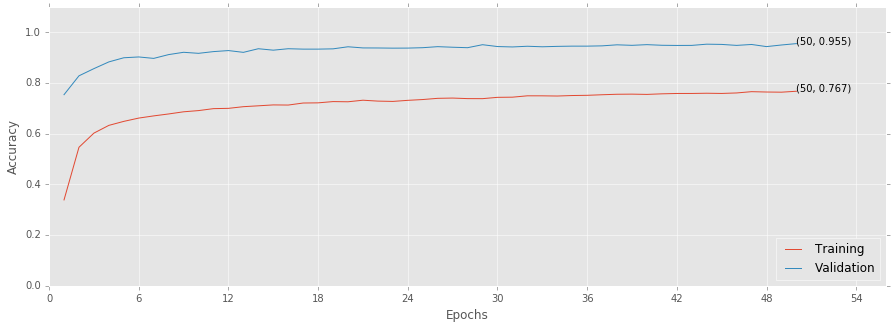

In [42]:
# This session should only be run once to train the model. It reinitializes weights
# and biases with random values, previously saved weights and biases will be lost
from sklearn.utils import shuffle

with tf.Session(graph=model_graph, config=config) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1,1,1)
    train_accuracy_list.clear()
    valid_accuracy_list.clear()
    print('Training model...')
    print()
    
    #X_train_data, y_train_data = (X_train, y_train)
    X_train_input, y_train_input = (X_train_aug, y_train_aug)
    for i in range(EPOCHS):
        # Shuffle the inputs
        X_train_input, y_train_input = shuffle(X_train_input, y_train_input)
        batch_accuracies = []
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_train_input[offset:offset+BATCH_SIZE], y_train_input[offset:offset+BATCH_SIZE]
            batch_accuracy, _ = sess.run([accuracy_operation, training_operation],
                                         feed_dict={x:batch_x, y:batch_y, is_training:True})
            batch_accuracies.append(batch_accuracy)

        # Training accurary on training data set
        train_accuracy_list.append(np.mean(batch_accuracies))

        # Validate accuracy on validation data set
        validation_accuracy = evaluate(X_valid, y_valid)
        valid_accuracy_list.append(validation_accuracy)
        plot_accuracy(fig, ax)
        
    # Finally save the preciously trained parameters
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, save_path="./lenet")
    print("Model saved with validation accuracy: {:.3f}".format(valid_accuracy_list[-1]))

<span style="color:indigo">At this point, we don't need training and validation data and can free up memory used by that</span>

In [43]:
import gc

del X_train, y_train, X_train_aug, y_train_aug, X_valid, y_valid

In [44]:
gc.collect()

20015

<span style="color:indigo">Evaluate model on test data set now</span>

In [45]:
with tf.Session(graph=model_graph) as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

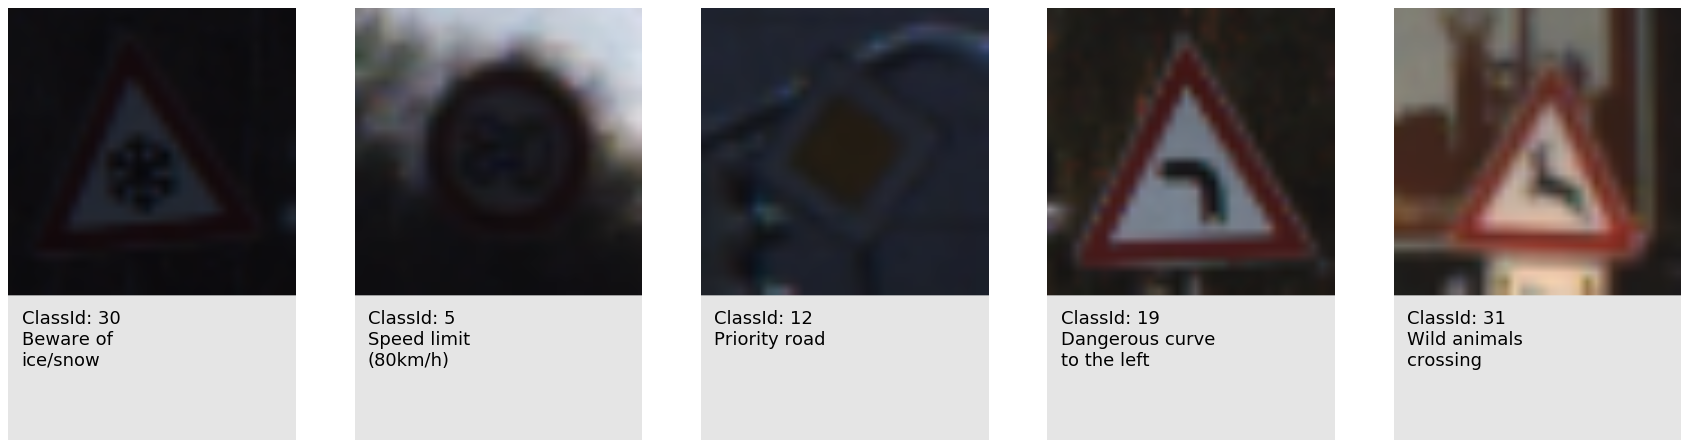

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import glob
import random
import cv2
from textwrap import wrap

%matplotlib inline

def pick_random_image():
    # Pick up random image form randomly selected directory
    GTSRB_path = "./dataset/GTSRB/Final_Training/Images"
    rand_dir = random.choice(glob.glob(GTSRB_path + '/*'))
    image_file = random.choice(glob.glob(rand_dir + '/*.ppm'))

    # Get image info from csv file
    content = pd.read_csv(glob.glob(rand_dir + '/*.csv')[0], delimiter=';')
    iminfo = content[content['Filename'] == os.path.basename(image_file)]

    # crop image based on annotations provided in file
    img = plt.imread(image_file)
    #img = img[int(iminfo['Roi.Y1']):int(iminfo['Roi.Y2']),
    #          int(iminfo['Roi.X1']):int(iminfo['Roi.X2']),:]
    img = cv2.resize(img, dsize=(32,32))
    
    return (img, iminfo['ClassId'])

def show_images(x_images, y_classes, **kwargs):
    fig = plt.figure(figsize=(30,20))
    assert(x_images.shape[0] == y_classes.shape[0])
    n_col = 5
    n_row = (x_images.shape[0] + n_col - 1) // n_col
    for i in range(x_images.shape[0]):
        plt.subplot(n_row, n_col, i+1)
        plt.xticks([])
        plt.yticks([])
        sign = signmap.iloc[y_classes[i]]
        plt.axis([0, 10, 0, 15])
        plt.imshow(x_images[i], extent=[0, 10, 5, 15])
        imgtxt = "ClassId: " + str(sign['ClassId']) + "\n" + "\n".join(wrap(sign['SignName'], 15))
        plt.text(0.5, 4.5, imgtxt, ha="left", va="top", fontsize=18)
        if 'y_correct' in kwargs:
            y_correct = kwargs['y_correct']
            icon = None
            if y_classes[i] == y_correct[i]:
                icon = plt.imread('./WrightIcon.png')
            else:
                icon = plt.imread('./WrongIcon.png')
            plt.imshow(icon, extent=[8,10,0,2])

n_images = 5
X_gtsrb_test, y_gtsrb_test = (np.empty((n_images, 32, 32, 3), dtype=np.uint8), np.empty(n_images, dtype=np.int32))
for i in range(n_images):
    X_gtsrb_test[i], y_gtsrb_test[i] = pick_random_image()
show_images(X_gtsrb_test, y_gtsrb_test)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


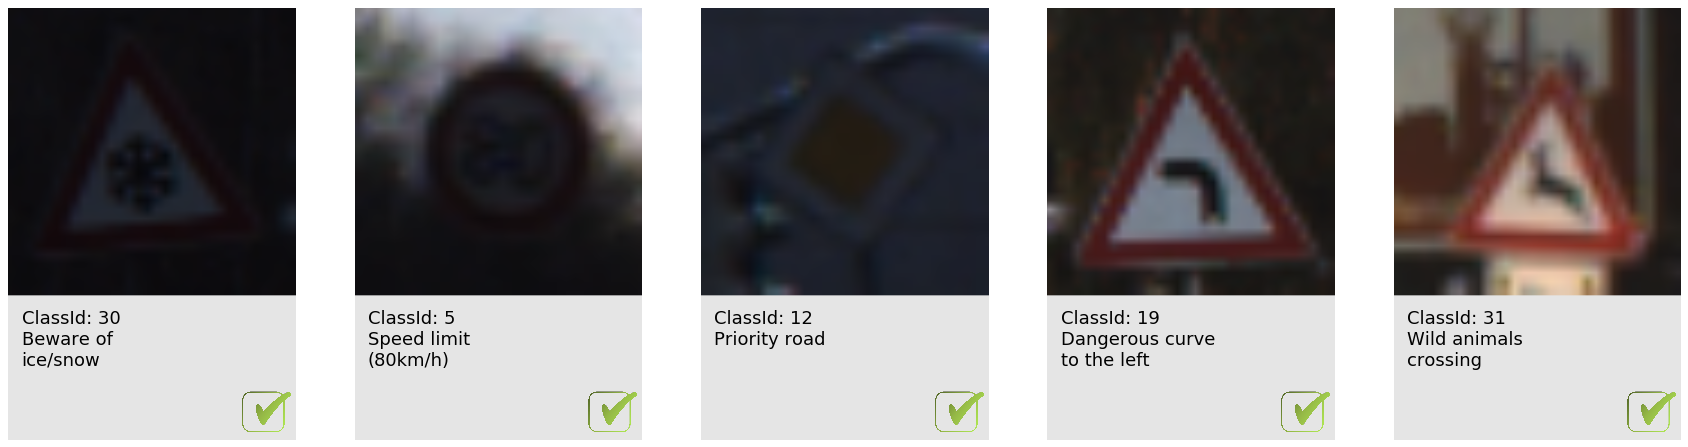

In [47]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
gtsrb_logits = None
with tf.Session(graph=model_graph) as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    gtsrb_logits, gtsrb_predictions = sess.run((predicted_logits, predictions),
                                               feed_dict={ x:X_gtsrb_test, y:y_gtsrb_test, is_training:False})
    show_images(X_gtsrb_test, gtsrb_predictions, y_correct=y_gtsrb_test)

### Analyze Performance

In [48]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session(graph=model_graph) as sess:
    accuracy = sess.run(accuracy_operation, feed_dict={predicted_logits:gtsrb_logits, y:y_gtsrb_test})
    print("Test accuracy = {:.3f}".format(accuracy))

Test accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    input_logits = tf.placeholder(tf.float32, (None, n_classes))
    softmax_prob = tf.nn.softmax(input_logits)
    TOP_K = 5
    topk_softmax = tf.nn.top_k(softmax_prob, k=TOP_K)
    topk = sess.run(topk_softmax, feed_dict={input_logits:gtsrb_logits})
    print(topk)
    print()
    for i,values,indices in zip(range(n_images), topk.values, topk.indices):
        print("Actual class: " + signmap.iloc[y_gtsrb_test[i]]['SignName'])
        print("Top " + str(TOP_K) + " predictions:")
        for value,index in zip(values, indices):
            print(signmap.iloc[index]['SignName'] + ", Probability {:.3f}".format(value))
        print()

TopKV2(values=array([[  9.82643127e-01,   1.67594086e-02,   2.28565928e-04,
          1.80804665e-04,   7.62136769e-05],
       [  8.96400571e-01,   8.74305740e-02,   6.52631791e-03,
          5.27746975e-03,   3.43471952e-03],
       [  1.00000000e+00,   2.25976677e-08,   1.08352743e-10,
          1.02946731e-11,   4.14527093e-12],
       [  9.99429762e-01,   5.48600219e-04,   2.13038584e-05,
          1.93453786e-07,   7.81564324e-08],
       [  9.99970913e-01,   2.85489186e-05,   1.52964731e-07,
          9.51173789e-08,   4.74985598e-08]], dtype=float32), indices=array([[30, 11, 21, 28, 27],
       [ 5,  3,  7, 10,  8],
       [12, 40, 16, 32, 23],
       [19, 23, 21, 30, 31],
       [31, 21, 19, 23, 27]], dtype=int32))

Actual class: Beware of ice/snow
Top 5 predictions:
Beware of ice/snow, Probability 0.983
Right-of-way at the next intersection, Probability 0.017
Double curve, Probability 0.000
Children crossing, Probability 0.000
Pedestrians, Probability 0.000

Actual class: Spe

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [50]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, is_training : False})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


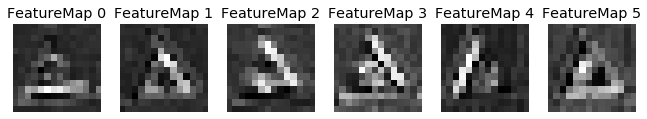

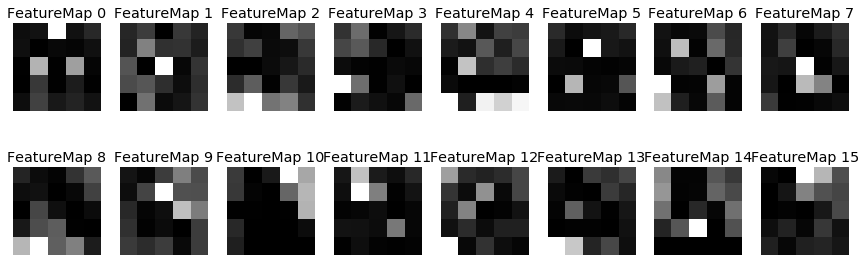

In [51]:
with tf.Session(graph=model_graph) as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    img = np.empty((1, 32, 32, 3))
    img[0] = X_gtsrb_test[0]
    conv1 = tf.get_default_graph().get_tensor_by_name("conv1/activation:0")
    outputFeatureMap(img, conv1, plt_num=1)
    conv2 = tf.get_default_graph().get_tensor_by_name("conv2/activation:0")
    outputFeatureMap(img, conv2, plt_num=2)